In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings("ignore")

sns.set_theme()

print("Imported")

Imported


In [2]:
data = pd.read_csv("/Users/dineshkumaranbalagan/Downloads/airbnb-listings.csv", sep = ";")
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,17619081,https://www.airbnb.com/rooms/17619081,20170615002708,2017-06-15,Nice smallroom i central old Frederiksberg,Min bolig lægger tæt på Bus og Metro. Frederik...,NaN,Min bolig lægger tæt på Bus og Metro. Frederik...,none,NaN,...,10.0,8.0,10.0,NaN,NaN,flexible,2.0,0.66,"55.6759793551,12.5329597787","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,13356620,https://www.airbnb.com/rooms/13356620,20170615002708,2017-06-15,Spacious 95 m2 3 room apt. with great location,Spacious and sunny apt. located close to the b...,The apt. is located on 3rd floor and faces a t...,Spacious and sunny apt. located close to the b...,none,NaN,...,10.0,10.0,9.0,NaN,NaN,strict,1.0,0.41,"55.6759094982,12.5343258647","Host Has Profile Pic,Host Identity Verified,Is..."
2,18993602,https://www.airbnb.com/rooms/18993602,20170615002708,2017-06-15,Bright and lovely 3 room apartment in Copenhagen,Lovely newly renovated 3 room apartment locate...,NaN,Lovely newly renovated 3 room apartment locate...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,2.0,NaN,"55.6914472628,12.5328311114","Host Has Profile Pic,Host Identity Verified"
3,4313438,https://www.airbnb.com/rooms/4313438,20170615002708,2017-06-15,CHAMERENDE FAMILIE LEJLIGHED,Velkommen til vores charmerende lejlighed mid...,NaN,Velkommen til vores charmerende lejlighed mid...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"55.6829245038,12.5365649817","Host Has Profile Pic,Is Location Exact"
4,9029859,https://www.airbnb.com/rooms/9029859,20170615002708,2017-06-15,Room in Frederiksberg - Free wifi,Welcome to CPH ! We are 6 lovely people livin...,NaN,Welcome to CPH ! We are 6 lovely people livin...,none,NaN,...,10.0,10.0,9.0,NaN,NaN,flexible,1.0,0.15,"55.6839657227,12.5530294872","Host Has Profile Pic,Host Identity Verified,Is..."


In [3]:
data.shape

(494954, 89)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494954 entries, 0 to 494953
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              494954 non-null  object 
 1   Listing Url                     494954 non-null  object 
 2   Scrape ID                       494954 non-null  object 
 3   Last Scraped                    494953 non-null  object 
 4   Name                            494536 non-null  object 
 5   Summary                         478753 non-null  object 
 6   Space                           347019 non-null  object 
 7   Description                     494794 non-null  object 
 8   Experiences Offered             494954 non-null  object 
 9   Neighborhood Overview           291604 non-null  object 
 10  Notes                           197643 non-null  object 
 11  Transit                         303786 non-null  object 
 12  Access          

In [5]:
data["Country"].unique()

array(['Denmark', 'United States', 'United Kingdom', 'Belgium',
       'Hong Kong', 'China', 'Spain', 'Ireland', 'Australia', 'Canada',
       'Switzerland', 'France', 'Cuba', 'Germany', 'Netherlands',
       'Greece', 'Italy', 'Vatican City', 'Austria', '0', 'Vanuatu',
       'Mexico', nan, 'Uruguay'], dtype=object)

In [6]:
denmark = data[data["Country"] == "Denmark"].shape
united_states = data[data["Country"] == "United States"].shape
united_kingdom = data[data["Country"] == "United Kingdom"].shape
belgium = data[data["Country"] == "Belgium"].shape
hong_kong = data[data["Country"] == "Hong Kong"].shape
china = data[data["Country"] == "China"].shape
spain = data[data["Country"] == "Spain"].shape
ireland = data[data["Country"] == "Ireland"].shape
australia = data[data["Country"] == "Australia"].shape
canada = data[data["Country"] == "Canada"].shape
switzerland = data[data["Country"] == "Switzerland"].shape
france = data[data["Country"] == "France"].shape
cuba = data[data["Country"] == "Cuba"].shape
germany = data[data["Country"] == "Germany"].shape
netherlands = data[data["Country"] == "Netherlands"].shape
greece = data[data["Country"] == "Greece"].shape
italy = data[data["Country"] == "Italy"].shape
vatican_city = data[data["Country"] == "Vatican City"].shape
austria = data[data["Country"] == "Austria"].shape
vanuatu = data[data["Country"] == "Vanuatu"].shape
mexico = data[data["Country"] == "Mexico"].shape
uruguay = data[data["Country"] == "Uruguay"].shape

In [7]:
countries = list(data["Country"].unique())
Index = []
country_price_null = dict()
for j, i in enumerate(countries):
    if (i != "0") & (i != np.nan):
        Index.append(j)
        target_col = data[data["Country"]==i]["Price"].isnull().sum()
        country_price_null.update({i:target_col})
price_nulls = pd.DataFrame(country_price_null, index = Index).iloc[0,:].to_frame().rename(columns = {0:"nulls"})

total_rows = []
for i in countries:
    if (i != "0") & (i != np.nan):
        target_col = data[data["Country"]==i].shape[0]
        total_rows.append(target_col)
        
price_nulls["total_rows"] = total_rows
price_nulls["missing_percent"] = price_nulls["nulls"]/price_nulls["total_rows"]

In [8]:
price_nulls.sort_values(["total_rows","missing_percent"])

,nulls,total_rows,missing_percent
NaN,0,0,NaN
Cuba,0,1,0.000000
Vanuatu,0,1,0.000000
Uruguay,0,1,0.000000
Vatican City,0,2,0.000000
Mexico,0,2,0.000000
China,1,51,0.019608
Switzerland,11,2381,0.004620
Greece,5,5127,0.000975
Hong Kong,1122,6423,0.174685


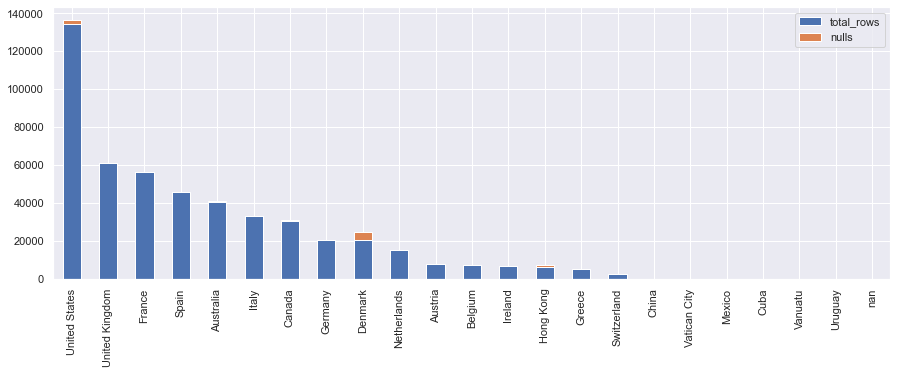

In [9]:
price_nulls[["total_rows","nulls"]].sort_values("total_rows", ascending = False).plot(kind = "bar", stacked = True,figsize = (15,5))
plt.show()

In [10]:
airbnb_us_listings = data[data["Country"] == "United States"].reset_index(drop = True)
airbnb_us_listings

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,16163330,https://www.airbnb.com/rooms/16163330,20170510102046,2017-05-10,Quiet Space to sleep & rest,"Hello. Small bedroom with twin bed, chair, ni...",NaN,"Hello. Small bedroom with twin bed, chair, ni...",none,NaN,...,10.0,9.0,10.0,NaN,"Illinois State, Cook County, IL, CHICAGO",strict,2.0,3.49,"41.9112817535,-87.7024631364","Host Has Profile Pic,Is Location Exact,Require..."
1,6846209,https://www.airbnb.com/rooms/6846209,20170510102046,2017-05-10,Rogue Philanthropy Manor,Our Humboldt Park home features 1.5 bathrooms ...,Old 120-year-old farm house appeal. Not a typ...,Our Humboldt Park home features 1.5 bathrooms ...,none,Humboldt Park is an emerging Chicago neighborh...,...,10.0,9.0,10.0,City registration pending,"Illinois State, Cook County, IL, CHICAGO",flexible,1.0,1.82,"41.906669658,-87.7142914077","Host Is Superhost,Host Has Profile Pic,Host Id..."
2,6448745,https://www.airbnb.com/rooms/6448745,20170510102046,2017-05-10,1 Bedroom in Beautiful Humboldt Park,Come stay in the beautiful Humboldt Park Neigh...,This is a private room with a queen bed locate...,Come stay in the beautiful Humboldt Park Neigh...,none,The park has a lot to offer. -tennis courts / ...,...,10.0,10.0,10.0,City registration pending,"Illinois State, Cook County, IL, CHICAGO",moderate,1.0,2.00,"41.9052639707,-87.7102974903","Host Has Profile Pic,Host Identity Verified,Is..."
3,18139782,https://www.airbnb.com/rooms/18139782,20170510102046,2017-05-10,Private Entry 2 Bdrm near Transit,This sunny 2nd floor 2 bedroom unit is newly r...,"A private, locked remodeled 2 bedroom, 1 bathr...",This sunny 2nd floor 2 bedroom unit is newly r...,none,Humboldt Park is a diverse and vibrant communi...,...,10.0,9.0,10.0,City registration pending,"Illinois State, Cook County, IL, CHICAGO",flexible,2.0,6.00,"41.896351912,-87.7297629805","Host Has Profile Pic,Host Identity Verified,Re..."
4,12467112,https://www.airbnb.com/rooms/12467112,20170510102046,2017-05-10,Beautiful Eco-Friendly Room in Garfield Park,Come stay with us in our beautiful home in Chi...,The house is beautifully refurbished with dark...,Come stay with us in our beautiful home in Chi...,none,"Historically, this neighborhood was a retreat ...",...,10.0,8.0,9.0,City registration pending,"Illinois State, Cook County, IL, CHICAGO",strict,3.0,6.58,"41.8871723326,-87.707649842","Host Has Profile Pic,Host Identity Verified,Is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134540,15214668,https://www.airbnb.com/rooms/15214668,20170306202425,2017-03-07,Spacious apartment 10 minutes from Zilker Park,"Our place is 10 minutes from Zilker Park/ACL,...",NaN,"Our place is 10 minutes from Zilker Park/ACL,...",none,NaN,...,10.0,10.0,NaN,NaN,NaN,flexible,1.0,0.20,"30.2475296442,-97.845385189","Host Has Profile Pic,Host Identity Verified,Is..."
134541,17345857,https://www.airbnb.com/rooms/17345857,20170306202425,2017-03-07,Barton Creek Retreat,My home is across the street from Barton Creek...,NaN,My home is across the street from Barton Creek...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"30.2920186871,-97.8632310658","Host Has Profile Pic,Is Location Exact,Instant..."
134542,16768276,https://www.airbnb.com/rooms/16768276,20170306202425,2017-03-07,"Cozy, modern room with vintage touches in hip ...",Our MCM inspired home is located in eclectic E...,NaN,Our MCM inspired home is located in eclectic E...,none,My place is close to: Sahara Lounge The Wheel ...,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"30.2810241038,-97.6836083724","Host Has Profile Pic,Host Identity Verified,Is..."
134543,17317756,https://www.airbnb.com/rooms/17317756,20170306202425,2017-03-07,Quirky Eastside Ra

In [11]:
#airbnb_us_listings.to_csv("us_airbnb_dataset.csv")

In [12]:
data_cat = airbnb_us_listings.select_dtypes("object")
data_num = airbnb_us_listings.select_dtypes("number")

In [13]:
data_cat.T

,0,1,2,3,4,5,6,7,8,9,...,134535,134536,134537,134538,134539,134540,134541,134542,134543,134544
ID,16163330,6846209,6448745,18139782,12467112,10661438,12243016,13621242,15925916,14055024,...,8387546,3425069,6120864,5362696,17318819,15214668,17345857,16768276,17317756,16943997
Listing Url,https://www.airbnb.com/rooms/16163330,https://www.airbnb.com/rooms/6846209,https://www.airbnb.com/rooms/6448745,https://www.airbnb.com/rooms/18139782,https://www.airbnb.com/rooms/12467112,https://www.airbnb.com/rooms/10661438,https://www.airbnb.com/rooms/12243016,https://www.airbnb.com/rooms/13621242,https://www.airbnb.com/rooms/15925916,https://www.airbnb.com/rooms/14055024,...,https://www.airbnb.com/rooms/8387546,https://www.airbnb.com/rooms/3425069,https://www.airbnb.com/rooms/6120864,https://www.airbnb.com/rooms/5362696,https://www.airbnb.com/rooms/17318819,https://www.airbnb.com/rooms/15214668,https://www.airbnb.com/rooms/17345857,https://www.airbnb.com/rooms/16768276,https://www.airbnb.com/rooms/17317756,https://www.airbnb.com/rooms/16943997
Scrape ID,20170510102046,20170510102046,20170510102046,20170510102046,20170510102046,20170510102046,20170510102046,20170510102046,20170510102046,20170510102046,...,20170306202425,20170306202425,20170306202425,20170306202425,20170306202425,20170306202425,20170306202425,20170306202425,20170306202425,20170306202425
Last Scraped,2017-05-10,2017-05-10,2017-05-10,2017-05-10,2017-05-10,2017-05-10,2017-05-10,2017-05-10,2017-05-10,2017-05-10,...,2017-03-07,2017-03-07,2017-03-07,2017-03-07,2017-03-07,2017-03-07,2017-03-07,2017-03-07,2017-03-07,2017-03-07
Name,Quiet Space to sleep & rest,Rogue Philanthropy Manor,1 Bedroom in Beautiful Humboldt Park,Private Entry 2 Bdrm near Transit,Beautiful Eco-Friendly Room in Garfield Park,"VIP (United Center, Loop, O'Hare)",Quiet Room 2,AFFORDABLE HISTORIC 3 bedCHICAGO ROW (entire)H...,"Dragon Den: Homan Square (Queen, 2 Guests)","The Green Room - Little Village (Queen, 2 Guests)",...,Relaxing East Austin Townhouse,"Private Efficiency, Pool/Tennis",THE MEADOWS At Anderson Mill,"Clean, peaceful room on the Greenbelt",Comfortable Bedroom w/ Private Bath,Spacious apartment 10 minutes from Zilker Park,Barton Creek Retreat,"Cozy, modern room with vintage touches in hip ...",Quirky Eastside Rambler,Modern 2 Bedroom Perfect for SXSW stay!
Summary,"Hello. Small bedroom with twin bed, chair, ni...",Our Humboldt Park home features 1.5 bathrooms ...,Come stay in the beautiful Humboldt Park Neigh...,This sunny 2nd floor 2 bedroom unit is newly r...,Come stay with us in our beautiful home in Chi...,My place is close to the United Center (Chicag...,Spacious bedroom in vintage grey stone townhom...,Entire 3 bedroom house LARGE & COMFORTABLE wi...,Located right on I-290 and the Blue Line this ...,"Located right in Chicago’s Little Village, thi...",...,Convenient East Austin townhouse with a wonde...,"Comfy and private efficiency on a beautiful, p...",I-183 at Lake Creek Pkwy -Awesome Austin - clo...,"This 1,100 square foot mid-century home in sou...",Conveniently located in Southwest Austin. Com...,"Our place is 10 minutes from Zilker Park/ACL,...",My home is across the street from Barton Creek...,Our MCM inspired home is located in eclectic E...,Recently remodeled quirky East Austin home jus...,This is a 3 bedroom 3 bath house that was buil...
Space,NaN,Old 120-year-old farm house appeal. Not a typ...,This is a private room with a queen bed locate...,"A private, locked remodeled 2 bedroom, 1 bathr...",The house is beautifully refurbished with dark...,"This room can accommodate up to 3 people, but ...",Guest room is centrally located upstairs with ...,You will be staying in the entire home! This h...,Room Specifications: - Luxurious Queen Mattres...,Room Specifications: - Luxurious Queen Mattres...,...,"The townhouse is comfortable and fun, with an...","This is a beautiful, green oasis in the middle...",Large 2 bedroom 2 bath condo - sleeps up to 8 ...,This listing is for the private room. 

# CATEGORICAL FEATURES

In [14]:
data_cat["License"].nunique()

3295

In [15]:
final_cat_table = data_cat.drop(["ID","Listing Url","Scrape ID","Last Scraped","Name","Summary","Space","Description",
               "Experiences Offered","Neighborhood Overview","Notes","Transit","Access","Interaction",
               "House Rules","Thumbnail Url","Medium Url","Picture Url","XL Picture Url","Host URL","Host Name",
               "Host Since","Host Location","Host About","Host Thumbnail Url","Host Picture Url","Host Neighbourhood",
               "Street","Zipcode","Smart Location","Country Code","Country","Calendar Updated","Calendar last Scraped",
               "Geolocation","First Review","Last Review"], axis = 1)

final_cat_table.head()

,Host Response Time,Host Acceptance Rate,Host Verifications,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Market,Property Type,Room Type,Bed Type,Amenities,Has Availability,License,Jurisdiction Names,Cancellation Policy,Features
0,within an hour,NaN,"email,phone,reviews",Humboldt Park,Humboldt Park,NaN,Chicago,IL,Chicago,Apartment,Private room,Real Bed,"Wireless Internet,Air conditioning,Kitchen,Hea...",NaN,NaN,"Illinois State, Cook County, IL, CHICAGO",strict,"Host Has Profile Pic,Is Location Exact,Require..."
1,within a day,NaN,"email,phone,reviews,kba",Humboldt Park,Humboldt Park,NaN,Chicago,IL,Chicago,House,Private room,Real Bed,"Internet,Wireless Internet,Air conditioning,Ki...",NaN,City registration pending,"Illinois State, Cook County, IL, CHICAGO",flexible,"Host Is Superhost,Host Has Profile Pic,Host Id..."
2,within an hour,NaN,"email,phone,facebook,google,reviews,jumio",Humboldt Park,Humboldt Park,NaN,Chicago,IL,Chicago,Apartment,Private room,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,City registration pending,"Illinois State, Cook County, IL, CHICAGO",moderate,"Host Has Profile Pic,Host Identity Verified,Is..."
3,within an hour,NaN,"email,phone,linkedin,reviews,kba,work_email",NaN,Humboldt Park,NaN,Chicago,IL,Chicago,Apartment,Entire home/apt,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets liv...",NaN,City registration pending,"Illinois State, Cook County, IL, CHICAGO",flexible,"Host Has Profile Pic,Host Identity Verified,Re..."
4,within an hour,NaN,"email,phone,reviews,jumio",Garfield Park,East Garfield Park,NaN,Chicago,IL,Chicago,House,Private room,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,City registration pending,"Illinois State, Cook County, IL, CHICAGO",strict,"Host Has Profile Pic,Host Identity Verified,Is..."


In [16]:
for columns in final_cat_table.columns:
    if final_cat_table[columns].dtype == "object":
        final_cat_table[columns] = final_cat_table[columns].str.lower()

final_cat_table.T

,0,1,2,3,4,5,6,7,8,9,...,134535,134536,134537,134538,134539,134540,134541,134542,134543,134544
Host Response Time,within an hour,within a day,within an hour,within an hour,within an hour,within an hour,within a few hours,within an hour,within an hour,within an hour,...,within a day,within a few hours,within an hour,within a few hours,within a few hours,NaN,NaN,NaN,NaN,NaN
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host Verifications,"email,phone,reviews","email,phone,reviews,kba","email,phone,facebook,google,reviews,jumio","email,phone,linkedin,reviews,kba,work_email","email,phone,reviews,jumio","email,phone,reviews,jumio","email,phone,reviews,kba","email,phone,manual_online,reviews,manual_offli...","email,phone,reviews,jumio,government_id","email,phone,reviews,jumio,government_id",...,"email,phone,reviews,jumio,kba","email,phone,reviews,kba","email,phone,reviews,kba","email,phone,reviews,jumio",phone,"email,phone,facebook,reviews,kba",phone,"email,phone,reviews,kba","email,phone,reviews,kba","email,phone"
Neighbourhood,humboldt park,humboldt park,humboldt park,NaN,garfield park,NaN,garfield park,garfield park,garfield park,little village,...,windsor park,long canyon,anderson mill,NaN,NaN,barton creek,barton creek,mlk & 183,mlk & 183,mlk & 183
Neighbourhood Cleansed,humboldt park,humboldt park,humboldt park,humboldt park,east garfield park,east garfield park,east garfield park,east garfield park,east garfield park,south lawndale,...,78723,78750,78750,78735,78735,78735,78735,78721,78721,78721
Neighbourhood Group Cleansed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,chicago,chicago,chicago,chicago,chicago,chicago,chicago,chicago,chicago,chicago,...,austin,austin,austin,austin,austin,austin,austin,austin,austin,austin
State,il,il,il,il,il,il,il,il,il,il,...,tx,tx,tx,tx,tx,tx,tx,tx,tx,tx
Market,chicago,chicago,chicago,chicago,chicago,chicago,chicago,chicago,chicago,chicago,...,austin,austin,austin,austin,austin,austin,austin,austin,austin,austin
Property Type,apartment,house,apartment,apartment,house,apartment,house,house,house,house,...,house,house,condominium,house,condominium,apartment,house,house,house,house


### SEPARATING "AMENITIES" COLUMN TO MULTIPLE COLUMNS USING DELIMITER ","

In [17]:
final_cat_table["Amenities"] = final_cat_table["Amenities"].apply(lambda x : str(x).replace("wireless internet","internet"))

In [18]:
final_cat_table["Amenities"].isnull().sum()

0

In [19]:
splitted = final_cat_table["Amenities"].str.split(",", expand = True)
cols = splitted.columns
z = []
for i in cols:
    uni = splitted[i].unique()
    z.extend(uni)

for i in set(z):
    if (i != None) & (pd.isna(i)!=True):
        final_cat_table[i] = final_cat_table["Amenities"].apply(lambda x: 1 if str(i) in str(x) else (np.nan if (pd.isna(x))|(x == None) else 0))

final_cat_table.drop(columns = ["Amenities"], axis = 1, inplace = True)
final_cat_table.head()

,Host Response Time,Host Acceptance Rate,Host Verifications,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Market,Property Type,...,extra pillows and blankets,hot water,washer / dryer,wide clearance to shower and toilet,free parking on premises,game console,air conditioning,baby bath,bed linens,nan
0,within an hour,NaN,"email,phone,reviews",humboldt park,humboldt park,NaN,chicago,il,chicago,apartment,...,0,0,0,0,0,0,1,0,0,0
1,within a day,NaN,"email,phone,reviews,kba",humboldt park,humboldt park,NaN,chicago,il,chicago,house,...,0,0,0,0,0,0,1,0,0,0
2,within an hour,NaN,"email,phone,facebook,google,reviews,jumio",humboldt park,humboldt park,NaN,chicago,il,chicago,apartment,...,0,0,0,0,0,0,1,0,0,0
3,within an hour,NaN,"email,phone,linkedin,reviews,kba,work_email",NaN,humboldt park,NaN,chicago,il,chicago,apartment,...,0,0,0,0,0,0,0,0,0,0
4,within an hour,NaN,"email,phone,reviews,jumio",garfield park,east garfield park,NaN,chicago,il,chicago,house,...,0,0,0,0,0,0,1,0,0,0


In [20]:
final_cat_table["pocket wifi"].isnull().sum()

0

### SEPARATING "HOST VERIFICATIONS" COLUMN TO MULTIPLE COLUMNS USING DELIMITER ","

In [21]:
final_cat_table["Host Verifications"].isnull().sum()

59

In [22]:
splitted = final_cat_table["Host Verifications"].str.split(",", expand = True)
cols = splitted.columns
z = []
for i in cols:
    uni = splitted[i].unique()
    z.extend(uni)

for i in set(z):
    if (i != None) & (pd.isna(i)!=True) & (i != "none") & (i != "nan"):
        final_cat_table[i] = final_cat_table["Host Verifications"].apply(lambda x: 1 if str(i) in str(x) else (np.nan if (pd.isna(x))|(x == None) else 0))
        
final_cat_table.drop(['nan',"Host Verifications"], axis = 1, inplace = True)
final_cat_table.head()

,Host Response Time,Host Acceptance Rate,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Market,Property Type,Room Type,...,selfie,email,identity_manual,phone,manual_online,government_id,sent_id,reviews,linkedin,amex
0,within an hour,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,apartment,private room,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,within a day,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,house,private room,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,within an hour,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,apartment,private room,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,within an hour,NaN,NaN,humboldt park,NaN,chicago,il,chicago,apartment,entire home/apt,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,within an hour,NaN,garfield park,east garfield park,NaN,chicago,il,chicago,house,private room,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
final_cat_table["sesame"].isnull().sum()

59

### SEPARATING "FEATURES" COLUMN TO MULTIPLE COLUMNS USING DELIMITER ","

In [24]:
final_cat_table["Features"].isnull().sum(0)

74

In [25]:
final_cat_table["Features"] = final_cat_table["Features"].str.lower()
splitted = final_cat_table["Features"].str.split(",", expand = True)
cols = splitted.columns
z = []
for i in cols:
    uni = splitted[i].unique()
    z.extend(uni)

for i in set(z):
    if (i != None) & (pd.isna(i)!=True) & (i != "none") & (i != "nan"):
        final_cat_table[i] = final_cat_table["Features"].apply(lambda x: 1 if str(i) in str(x) else (np.nan if (pd.isna(x))|(x == None) else 0))
        
final_cat_table.drop("Features", axis = 1, inplace = True)
final_cat_table.head()

,Host Response Time,Host Acceptance Rate,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Market,Property Type,Room Type,...,linkedin,amex,host has profile pic,host identity verified,is location exact,host is superhost,requires license,instant bookable,require guest phone verification,require guest profile picture
0,within an hour,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,apartment,private room,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,within a day,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,house,private room,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,within an hour,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,apartment,private room,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,within an hour,NaN,NaN,humboldt park,NaN,chicago,il,chicago,apartment,entire home/apt,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,within an hour,NaN,garfield park,east garfield park,NaN,chicago,il,chicago,house,private room,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0


In [26]:
final_cat_table["requires license"].isnull().sum()

74

### FINAL CAT DATASET

In [27]:
pd.set_option('display.max_rows', 500)

In [28]:
final_cat_table.T

,0,1,2,3,4,5,6,7,8,9,...,134535,134536,134537,134538,134539,134540,134541,134542,134543,134544
Host Response Time,within an hour,within a day,within an hour,within an hour,within an hour,within an hour,within a few hours,within an hour,within an hour,within an hour,...,within a day,within a few hours,within an hour,within a few hours,within a few hours,NaN,NaN,NaN,NaN,NaN
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighbourhood,humboldt park,humboldt park,humboldt park,NaN,garfield park,NaN,garfield park,garfield park,garfield park,little village,...,windsor park,long canyon,anderson mill,NaN,NaN,barton creek,barton creek,mlk & 183,mlk & 183,mlk & 183
Neighbourhood Cleansed,humboldt park,humboldt park,humboldt park,humboldt park,east garfield park,east garfield park,east garfield park,east garfield park,east garfield park,south lawndale,...,78723,78750,78750,78735,78735,78735,78735,78721,78721,78721
Neighbourhood Group Cleansed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,chicago,chicago,chicago,chicago,chicago,chicago,chicago,chicago,chicago,chicago,...,austin,austin,austin,austin,austin,austin,austin,austin,austin,austin
State,il,il,il,il,il,il,il,il,il,il,...,tx,tx,tx,tx,tx,tx,tx,tx,tx,tx
Market,chicago,chicago,chicago,chicago,chicago,chicago,chicago,chicago,chicago,chicago,...,austin,austin,austin,austin,austin,austin,austin,austin,austin,austin
Property Type,apartment,house,apartment,apartment,house,apartment,house,house,house,house,...,house,house,condominium,house,condominium,apartment,house,house,house,house
Room Type,private room,private room,private room,entire home/apt,private room,private room,private room,entire home/apt,private room,private room,...,entire home/apt,entire home/apt,entire home/apt,private room,private room,entire home/apt,private room,private room,entire home/apt,entire home/apt


# NUMERICAL FEATURES

In [29]:
data_num.T

,0,1,2,3,4,5,6,7,8,9,...,134535,134536,134537,134538,134539,134540,134541,134542,134543,134544
Host ID,3.836635e+06,3.587408e+07,2.753805e+07,2.230868e+07,1.284557e+06,5.487802e+07,1.287738e+07,2.571568e+07,6.458280e+07,6.458280e+07,...,2.854509e+06,1.726408e+07,3.175796e+07,2.779965e+07,6.693279e+07,2.693377e+06,1.171811e+08,1.826765e+07,3.020854e+07,7.055050e+07
Host Response Rate,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,9.600000e+01,1.000000e+02,9.400000e+01,1.000000e+02,1.000000e+02,1.000000e+02,...,5.000000e+01,9.000000e+01,1.000000e+02,1.000000e+02,1.000000e+02,NaN,NaN,NaN,NaN,NaN
Host Listings Count,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.600000e+01,1.600000e+01,...,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Host Total Listings Count,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.600000e+01,1.600000e+01,...,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Latitude,4.191128e+01,4.190667e+01,4.190526e+01,4.189635e+01,4.188717e+01,4.187954e+01,4.188145e+01,4.188402e+01,4.187191e+01,4.184460e+01,...,3.030882e+01,3.044713e+01,3.046109e+01,3.023529e+01,3.025260e+01,3.024753e+01,3.029202e+01,3.028102e+01,3.028028e+01,3.028240e+01
Longitude,-8.770246e+01,-8.771429e+01,-8.771030e+01,-8.772976e+01,-8.770765e+01,-8.769446e+01,-8.769596e+01,-8.769311e+01,-8.771525e+01,-8.772129e+01,...,-9.768309e+01,-9.779728e+01,-9.779808e+01,-9.780893e+01,-9.787524e+01,-9.784539e+01,-9.786323e+01,-9.768361e+01,-9.768364e+01,-9.767844e+01
Accommodates,1.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,8.000000e+00,2.000000e+00,2.000000e+00,...,5.000000e+00,1.000000e+00,8.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00,2.000000e+00,4.000000e+00,6.000000e+00,6.000000e+00
Bathrooms,1.000000e+00,1.500000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.500000e+00,3.000000e+00,1.000000e+00,...,1.500000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.500000e+00
Bedrooms,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,...,3.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00
Beds,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,...,3.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00


In [30]:
data_num.drop(["Host ID","Latitude","Longitude"], axis = 1, inplace = True)

In [31]:
data_num.head()

,Host Response Rate,Host Listings Count,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,100.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN,20.0,NaN,...,15.0,100.0,10.0,10.0,10.0,10.0,9.0,10.0,2.0,3.49
1,100.0,1.0,1.0,2.0,1.5,1.0,1.0,NaN,60.0,400.0,...,41.0,96.0,10.0,10.0,10.0,10.0,9.0,10.0,1.0,1.82
2,100.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,39.0,NaN,...,2.0,100.0,10.0,9.0,10.0,10.0,10.0,10.0,1.0,2.00
3,100.0,2.0,2.0,6.0,1.0,2.0,3.0,NaN,60.0,NaN,...,6.0,97.0,9.0,9.0,10.0,10.0,9.0,10.0,2.0,6.00
4,96.0,3.0,3.0,2.0,1.0,1.0,1.0,NaN,39.0,NaN,...,80.0,96.0,10.0,9.0,10.0,10.0,8.0,9.0,3.0,6.58


## FINAL DATASET

In [33]:
final_dataset = pd.concat([final_cat_table, data_num], axis = 1)
final_dataset.head()

,Host Response Time,Host Acceptance Rate,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Market,Property Type,Room Type,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,within an hour,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,apartment,private room,...,15.0,100.0,10.0,10.0,10.0,10.0,9.0,10.0,2.0,3.49
1,within a day,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,house,private room,...,41.0,96.0,10.0,10.0,10.0,10.0,9.0,10.0,1.0,1.82
2,within an hour,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,apartment,private room,...,2.0,100.0,10.0,9.0,10.0,10.0,10.0,10.0,1.0,2.00
3,within an hour,NaN,NaN,humboldt park,NaN,chicago,il,chicago,apartment,entire home/apt,...,6.0,97.0,9.0,9.0,10.0,10.0,9.0,10.0,2.0,6.00
4,within an hour,NaN,garfield park,east garfield park,NaN,chicago,il,chicago,house,private room,...,80.0,96.0,10.0,9.0,10.0,10.0,8.0,9.0,3.0,6.58


In [37]:
final_dataset.to_csv("airbnb_listing_final_dataset.csv", index = False)

In [38]:
pd.read_csv('airbnb_listing_final_dataset.csv')

,Host Response Time,Host Acceptance Rate,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Market,Property Type,Room Type,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,within an hour,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,apartment,private room,...,15.0,100.0,10.0,10.0,10.0,10.0,9.0,10.0,2.0,3.49
1,within a day,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,house,private room,...,41.0,96.0,10.0,10.0,10.0,10.0,9.0,10.0,1.0,1.82
2,within an hour,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,apartment,private room,...,2.0,100.0,10.0,9.0,10.0,10.0,10.0,10.0,1.0,2.00
3,within an hour,NaN,NaN,humboldt park,NaN,chicago,il,chicago,apartment,entire home/apt,...,6.0,97.0,9.0,9.0,10.0,10.0,9.0,10.0,2.0,6.00
4,within an hour,NaN,garfield park,east garfield park,NaN,chicago,il,chicago,house,private room,...,80.0,96.0,10.0,9.0,10.0,10.0,8.0,9.0,3.0,6.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134540,NaN,NaN,barton creek,78735,NaN,austin,tx,austin,apartment,entire home/apt,...,1.0,100.0,10.0,10.0,10.0,10.0,10.0,NaN,1.0,0.20
134541,NaN,NaN,barton creek,78735,NaN,austin,tx,austin,house,private room,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
134542,NaN,NaN,mlk & 183,78721,NaN,austin,tx,austin,house,private room,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
134543,NaN,NaN,mlk & 183,78721,NaN,austin,tx,austin,house,entire home/apt,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


### *continue...*